<a href="https://colab.research.google.com/github/Aditya-B-007/Chatbot/blob/main/Decision%20tree%20on%20loan%20dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install openpyxl # The reason why I installed it is because I could not read the dataset just using pandas csv
import openpyxl
import pandas as pd
data = pd.read_excel("/content/lending-club-loans.xlsx", engine="openpyxl")
#target column would be loan status, based on the data I would be finding whether the loan would be paid or not

In [2]:
data.head() # Displaying the first five rows of the dataset read. It has lots of missing values and has to be preprocessed

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,0.1065,162.87,B,B2,...,863.16,0.00,0.00,0.00,2015-01-01 00:00:00,171.62,NaN,2016-09-01 00:00:00,744.0,740.0
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,0.1527,59.83,C,C4,...,435.17,0.00,117.08,1.11,2013-04-01 00:00:00,119.66,NaN,2016-09-01 00:00:00,499.0,0.0
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,0.1596,84.33,C,C5,...,605.67,0.00,0.00,0.00,2014-06-01 00:00:00,649.91,NaN,2016-09-01 00:00:00,719.0,715.0
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,0.1349,339.31,C,C1,...,2214.92,16.97,0.00,0.00,2015-01-01 00:00:00,357.48,NaN,2016-04-01 00:00:00,604.0,600.0
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,0.1269,67.79,B,B5,...,1055.27,0.00,0.00,0.00,2016-09-01 00:00:00,67.79,2016-10-01 00:00:00,2016-09-01 00:00:00,694.0,690.0


In [3]:
data.fillna(0) # Fill all the "NA" with zero, in order to make it numerical

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,0.1065,162.87,B,B2,...,863.16,0.00,0.00,0.00,2015-01-01 00:00:00,171.62,0,2016-09-01 00:00:00,744.0,740.0
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,0.1527,59.83,C,C4,...,435.17,0.00,117.08,1.11,2013-04-01 00:00:00,119.66,0,2016-09-01 00:00:00,499.0,0.0
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,0.1596,84.33,C,C5,...,605.67,0.00,0.00,0.00,2014-06-01 00:00:00,649.91,0,2016-09-01 00:00:00,719.0,715.0
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,0.1349,339.31,C,C1,...,2214.92,16.97,0.00,0.00,2015-01-01 00:00:00,357.48,0,2016-04-01 00:00:00,604.0,600.0
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,0.1269,67.79,B,B5,...,1055.27,0.00,0.00,0.00,2016-09-01 00:00:00,67.79,2016-10-01 00:00:00,2016-09-01 00:00:00,694.0,690.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42548,505136,650770.0,20000.0,20000.0,19500.0,36 months,0.0988,644.21,B,B1,...,3193.07,0.00,0.00,0.00,2013-05-01 00:00:00,680.70,0,2013-05-01 00:00:00,839.0,835.0
42549,473367,598172.0,1750.0,1750.0,1750.0,36 months,0.1183,57.99,B,B3,...,153.99,0.00,0.00,0.00,2010-11-01 00:00:00,1384.36,0,2016-01-01 00:00:00,709.0,705.0
42550,70686,70681.0,5000.0,5000.0,0.0,36 months,0.0775,156.11,A,A3,...,619.76,0.00,0.00,0.00,2010-06-01 00:00:00,156.39,2010-07-01 00:00:00,2015-02-01 00:00:00,794.0,790.0
42551,Total amount funded in policy code 1: 460296150,0.0,0.0,0.0,0.0,0,0.0000,0.00,0,0,...,0.00,0.00,0.00,0.00,0,0.00,0,0,0.0,0.0


In [4]:
data.isnull().sum(axis = 1) # Finding out how many columns and rows have null values in order to remove them
data.isnull().sum(axis = 0)

id                             0
member_id                      3
loan_amnt                      3
funded_amnt                    3
funded_amnt_inv                3
term                           3
int_rate                       3
installment                    3
grade                          3
sub_grade                      3
emp_title                   2630
emp_length                  1115
home_ownership                 3
annual_inc                     7
verification_status            3
issue_d                        3
loan_status                    3
pymnt_plan                     3
url                            3
desc                       13300
purpose                        3
title                         17
zip_code                       3
addr_state                     3
dti                            3
delinq_2yrs                   34
earliest_cr_line              34
fico_range_low                 3
fico_range_high                3
inq_last_6mths                34
mths_since

In [5]:
half_count = len(data) / 2
data= data.dropna(thresh=half_count,axis=1) # Drop any column with more than 50% missing values, why ? because they will not affect our target column when passing it through our decision tree or any other machine learning models
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,0.1065,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,2015-01-01 00:00:00,171.62,2016-09-01 00:00:00,744.0,740.0
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,0.1527,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,2013-04-01 00:00:00,119.66,2016-09-01 00:00:00,499.0,0.0
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,0.1596,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,2014-06-01 00:00:00,649.91,2016-09-01 00:00:00,719.0,715.0
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,0.1349,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,2015-01-01 00:00:00,357.48,2016-04-01 00:00:00,604.0,600.0
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,0.1269,67.79,B,B5,...,2729.22,1055.27,0.00,0.00,0.00,2016-09-01 00:00:00,67.79,2016-09-01 00:00:00,694.0,690.0


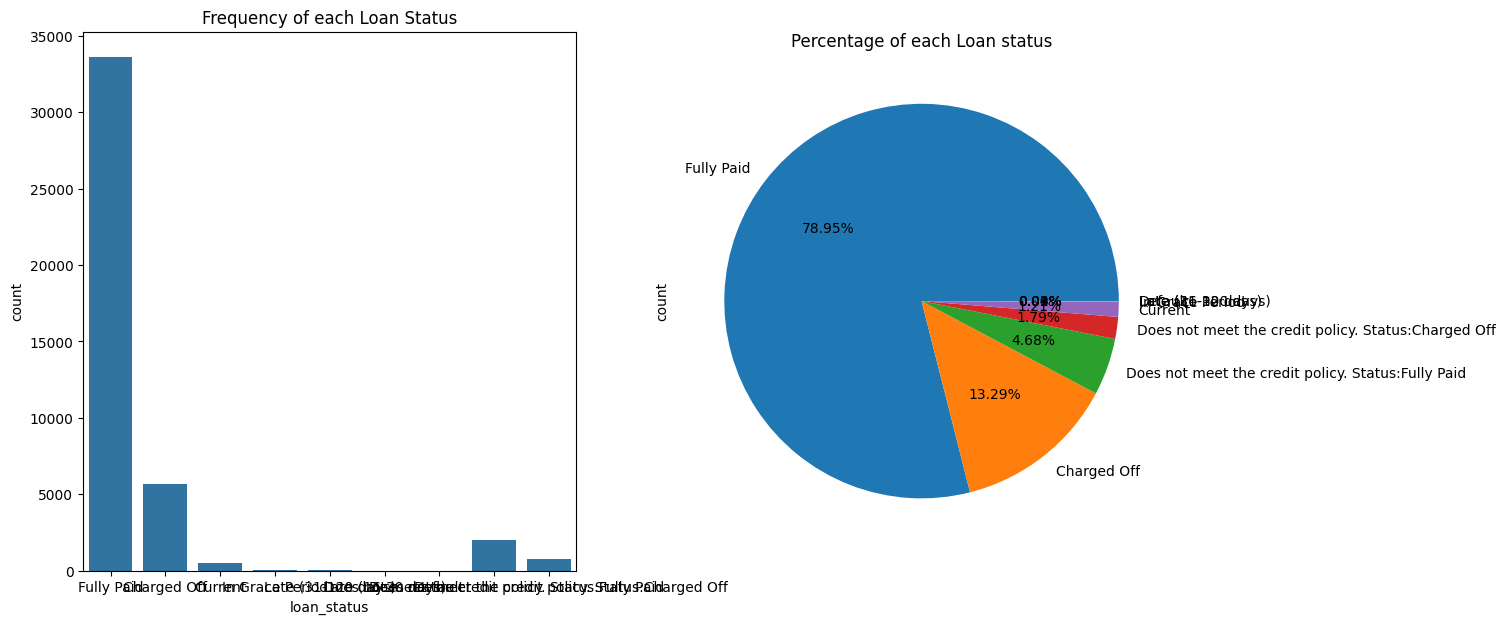

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axs = plt.subplots(1,2,figsize=(14,7))
sns.countplot(x='loan_status',data=data,ax=axs[0])
axs[0].set_title("Frequency of each Loan Status")
data.loan_status.value_counts().plot(x=None,y=None, kind='pie',
ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage of each Loan status")
plt.show()
# Before actual preprocessing let us analyse our data graphically

In [7]:
unique_values = data['grade'].unique()
print(unique_values) #Less number of different values and they have internal ordering present in them thus they are ordinal dataset.

['B' 'C' 'A' 'E' 'F' 'D' 'G' nan]


In [8]:
unique_values = data['sub_grade'].unique()
print(unique_values)# Checking few features which may determine our loan paid status on how many variety are there in it

['B2' 'C4' 'C5' 'C1' 'B5' 'A4' 'E1' 'F2' 'C3' 'B1' 'D1' 'A1' 'B3' 'B4'
 'C2' 'D2' 'A3' 'A5' 'D5' 'A2' 'E4' 'D3' 'D4' 'F3' 'E3' 'F4' 'F1' 'E5'
 'G4' 'E2' 'G3' 'G2' 'G1' 'F5' 'G5' nan]


In [9]:
unique_values = data['title'].unique()
print(len(unique_values)) #We can easily drop the columns as there on an average only 2 cases for every unique value and it does not affect whether the loan is paid or not.

21251


In [10]:
unique_values = data['emp_length'].unique()
print(len(unique_values)) #We can easily drop the columns as there on an average only 2 cases for every unique value.

12


In [11]:
data= data.loc[:,data.apply(pd.Series.nunique) != 1] # Removed all those columns having one value throughout

In [12]:
columns_to_be_deleted=['earliest_cr_line','id','member_id','emp_title','pymnt_plan','url','desc','purpose','title','zip_code','addr_state']

data = data.drop(columns=columns_to_be_deleted) #Deleted all unnecesarry features

In [13]:
data.head()
#from 114 columns we have reduced it to only 38 columns by identifying the columns which are redudant and not of any use to us.

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low
0,5000.0,5000.0,4975.0,36 months,0.1065,162.87,B,B2,10+ years,RENT,...,5000.00,863.16,0.00,0.00,0.00,2015-01-01 00:00:00,171.62,2016-09-01 00:00:00,744.0,740.0
1,2500.0,2500.0,2500.0,60 months,0.1527,59.83,C,C4,< 1 year,RENT,...,456.46,435.17,0.00,117.08,1.11,2013-04-01 00:00:00,119.66,2016-09-01 00:00:00,499.0,0.0
2,2400.0,2400.0,2400.0,36 months,0.1596,84.33,C,C5,10+ years,RENT,...,2400.00,605.67,0.00,0.00,0.00,2014-06-01 00:00:00,649.91,2016-09-01 00:00:00,719.0,715.0
3,10000.0,10000.0,10000.0,36 months,0.1349,339.31,C,C1,10+ years,RENT,...,10000.00,2214.92,16.97,0.00,0.00,2015-01-01 00:00:00,357.48,2016-04-01 00:00:00,604.0,600.0
4,3000.0,3000.0,3000.0,60 months,0.1269,67.79,B,B5,1 year,RENT,...,2729.22,1055.27,0.00,0.00,0.00,2016-09-01 00:00:00,67.79,2016-09-01 00:00:00,694.0,690.0


In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['grade'] = le.fit_transform(data['grade'])
data['sub_grade']=le.fit_transform(data['sub_grade'])
data['home_ownership']=le.fit_transform(data['home_ownership'])
data['verification_status']=le.fit_transform(data['verification_status'])
data['loan_status']=le.fit_transform(data['loan_status'])
data['issue_d']=le.fit_transform(data['issue_d'])
data['term']=le.fit_transform(data['term'])
data['emp_length']=le.fit_transform(data['emp_length'])
#Transformed all the features by label encoding as number of features is not so high

In [15]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low
0,5000.0,5000.0,4975.0,0,0.1065,162.87,1,6,1,4,...,5000.00,863.16,0.00,0.00,0.00,2015-01-01 00:00:00,171.62,2016-09-01 00:00:00,744.0,740.0
1,2500.0,2500.0,2500.0,1,0.1527,59.83,2,13,10,4,...,456.46,435.17,0.00,117.08,1.11,2013-04-01 00:00:00,119.66,2016-09-01 00:00:00,499.0,0.0
2,2400.0,2400.0,2400.0,0,0.1596,84.33,2,14,1,4,...,2400.00,605.67,0.00,0.00,0.00,2014-06-01 00:00:00,649.91,2016-09-01 00:00:00,719.0,715.0
3,10000.0,10000.0,10000.0,0,0.1349,339.31,2,10,1,4,...,10000.00,2214.92,16.97,0.00,0.00,2015-01-01 00:00:00,357.48,2016-04-01 00:00:00,604.0,600.0
4,3000.0,3000.0,3000.0,1,0.1269,67.79,1,9,0,4,...,2729.22,1055.27,0.00,0.00,0.00,2016-09-01 00:00:00,67.79,2016-09-01 00:00:00,694.0,690.0


In [16]:
df = data.iloc[:, :18] # Taking only the starting 18 columns as after 18th column, it does not determine our loan paid status

In [17]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,dti,delinq_2yrs,fico_range_low,fico_range_high
0,5000.0,5000.0,4975.0,0,0.1065,162.87,1,6,1,4,24000.0,2,54,5,27.65,0,735,739
1,2500.0,2500.0,2500.0,1,0.1527,59.83,2,13,10,4,30000.0,1,54,0,1,0,740,744
2,2400.0,2400.0,2400.0,0,0.1596,84.33,2,14,1,4,12252.0,0,54,5,8.72,0,735,739
3,10000.0,10000.0,10000.0,0,0.1349,339.31,2,10,1,4,49200.0,1,54,5,20,0,690,694
4,3000.0,3000.0,3000.0,1,0.1269,67.79,1,9,0,4,80000.0,1,54,1,17.94,0,695,699


In [18]:
c=['dti','delinq_2yrs','fico_range_low','fico_range_high']
df = df.drop(columns=c)
df=df.dropna() #further dropping columns

In [19]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status
0,5000.0,5000.0,4975.0,0,0.1065,162.87,1,6,1,4,24000.0,2,54,5
1,2500.0,2500.0,2500.0,1,0.1527,59.83,2,13,10,4,30000.0,1,54,0
2,2400.0,2400.0,2400.0,0,0.1596,84.33,2,14,1,4,12252.0,0,54,5
3,10000.0,10000.0,10000.0,0,0.1349,339.31,2,10,1,4,49200.0,1,54,5
4,3000.0,3000.0,3000.0,1,0.1269,67.79,1,9,0,4,80000.0,1,54,1


In [20]:
y=df['loan_status']
x=df.drop("loan_status",axis=1) #Making our features and target label seperate so that we can train our machine learning models easily.

In [21]:
x.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d
0,5000.0,5000.0,4975.0,0,0.1065,162.87,1,6,1,4,24000.0,2,54
1,2500.0,2500.0,2500.0,1,0.1527,59.83,2,13,10,4,30000.0,1,54
2,2400.0,2400.0,2400.0,0,0.1596,84.33,2,14,1,4,12252.0,0,54
3,10000.0,10000.0,10000.0,0,0.1349,339.31,2,10,1,4,49200.0,1,54
4,3000.0,3000.0,3000.0,1,0.1269,67.79,1,9,0,4,80000.0,1,54


In [22]:
y.head() # The pandas dataframe for our target variable

0    5
1    0
2    5
3    5
4    1
Name: loan_status, dtype: int64

In [23]:
y_numpy=y.to_numpy() #Creating a numpy dataframe for the target variable

In [24]:
from sklearn.preprocessing import StandardScaler
data_scaler=StandardScaler()

In [25]:
cols = x.columns
x_scaled = pd.DataFrame(data_scaler.fit_transform(x), columns=cols)

In [26]:
x_scaled.head()# This is the pandas dataframe of the x dataframe.

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d
0,-0.821728,-0.814568,-0.724258,-0.590723,-0.408566,-0.764620,-0.466414,-0.622981,-0.945405,0.964951,-0.704237,1.304998,1.166537
1,-1.159072,-1.164371,-1.071312,1.692841,0.837336,-1.257822,0.228771,0.366916,1.709299,0.964951,-0.610613,0.144266,1.166537
2,-1.172566,-1.178363,-1.085335,-0.590723,1.023412,-1.140552,0.228771,0.508330,-0.945405,0.964951,-0.887553,-1.016465,1.166537
3,-0.147039,-0.114962,-0.019632,-0.590723,0.357313,0.079912,0.228771,-0.057325,-0.945405,0.964951,-0.311016,0.144266,1.166537
4,-1.091603,-1.094410,-1.001200,1.692841,0.141572,-1.219721,-0.466414,-0.198739,-1.240372,0.964951,0.169588,0.144266,1.166537


In [47]:
print(x_scaled.shape)

(42546, 13)


In [27]:
x_scaled_numpy = data_scaler.fit_transform(x) #This is the Numpy dataframe of the x dataframe.

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

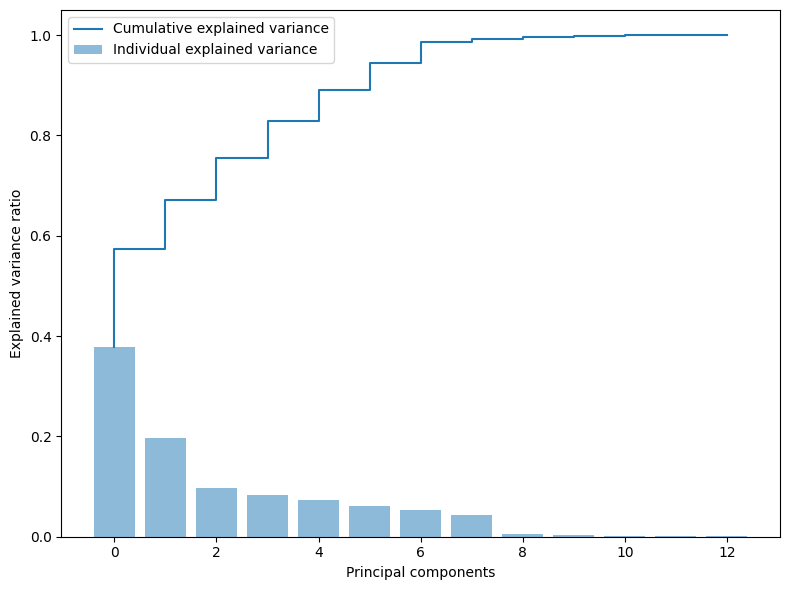

In [31]:
# Perform PCA on the data, just to check how many principal component axis must I take.
pca = PCA()
X_pca = pca.fit_transform(x_scaled_numpy)
# Calculating explained variance ratio
explained_variance = pca.explained_variance_ratio_
# Create cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)
# Create the plot for checking the best value to be taken
plt.figure(figsize=(8, 6))
plt.bar(range(len(explained_variance)), explained_variance, alpha=0.5, label='Individual explained variance')
plt.step(range(len(cumulative_explained_variance)), cumulative_explained_variance, label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [32]:
pca=PCA(n_components=4) # The elbow point is coming around 6, but that would result in more features, choosing Principal components as 4 as it will retain 83% of the data which is satisfactory

In [33]:
pca.fit(x_scaled_numpy)

PCA(n_components=4)

In [34]:
x_pca=pca.transform(x_scaled_numpy)

In [35]:
x_pca.shape

(42546, 4)

Text(0, 0.5, 'Second principal component')

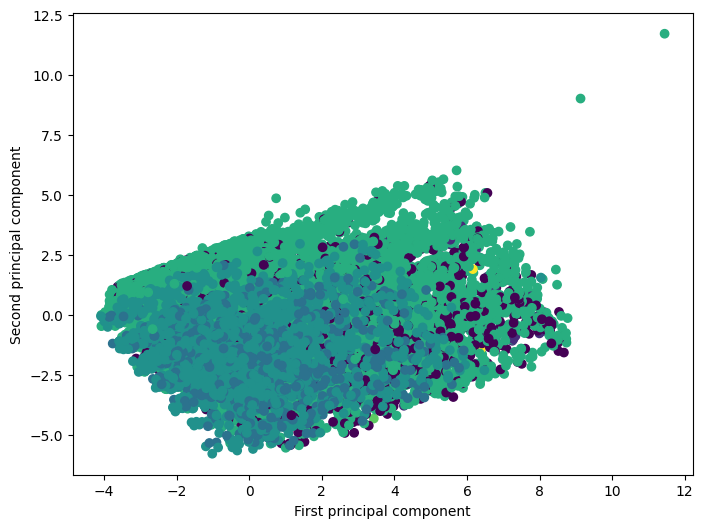

In [36]:
plt.figure(figsize=(8,6)) # I have to plot the data distribution.
plt.scatter(x_pca[:,0],x_pca[:,1],c=y_numpy)
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

In [72]:
X=pd.DataFrame(x_pca)
Y=pd.DataFrame(y_numpy)

In [73]:
X.reset_index(drop=True, inplace=True)
Y.reset_index(drop=True, inplace=True)

In [74]:
print(X.shape)
#print(Y.shape)

(42546, 4)


In [40]:
combined_df = pd.concat([X,Y], axis=1) # So that I can save this dataframe along with the target feature.

In [41]:
combined_df.head()

,0,1,2,3,0
0,-1.515402,0.208018,-1.521425,-0.253644,5
1,-1.161848,-2.050188,-2.472692,-0.853744,0
2,-1.756121,-1.924025,-0.872351,0.023437,5
3,-0.007651,-0.174301,-0.610941,-0.334482,5
4,-1.366224,-0.857337,-2.178907,0.925351,1


In [43]:
combined_df.to_csv('/content/lending-club-loans-processed.xlsx',index=False) # Saving my processed dataframe.

In [86]:
print(X.shape)
print(Y.shape)

(42546, 4)
(42546, 1)


In [93]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV # for hyperparameter tuning
clf = DecisionTreeClassifier()

In [90]:
X_train, X_test, t_train, t_test = train_test_split(
    x_pca, y_numpy, test_size=0.3, shuffle=True, random_state=1)

In [102]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define hyperparameter space
param_grid = {
    'max_depth': [2, 4, 8,10,20,35,50], #This is the maximum depth of the tree. Smaller values can lead to a simpler model, while larger values allow the model to capture more information about the data.
    'min_samples_split': [10, 20, 30, 40, 50], # Larger the values more splitting, thus deeper understanding but it can lead to overfitting.
    'min_samples_leaf': [1, 4, 8, 16, 20], #Minimum number of samples required to be a leaf node
    'criterion': ['gini', 'entropy']
}
# Based on the above paramters execute the tuning
# Create the decision tree with hyperparameter tuning
clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)

# Training the model with hyperparameter tuning
clf.fit(X_train, t_train)

# Access the best hyperparameters
best_params = clf.best_params_


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [103]:
best_params = clf.best_params_
# Train the final model with the best hyperparameters on training data
final_model = DecisionTreeClassifier(**best_params) # Hyperparameters well tuned now let us train our new decision tree model.

In [104]:
final_model.fit(X_train, t_train)
# Evaluate the final model on the test set
y_pred = final_model.predict(X_test)

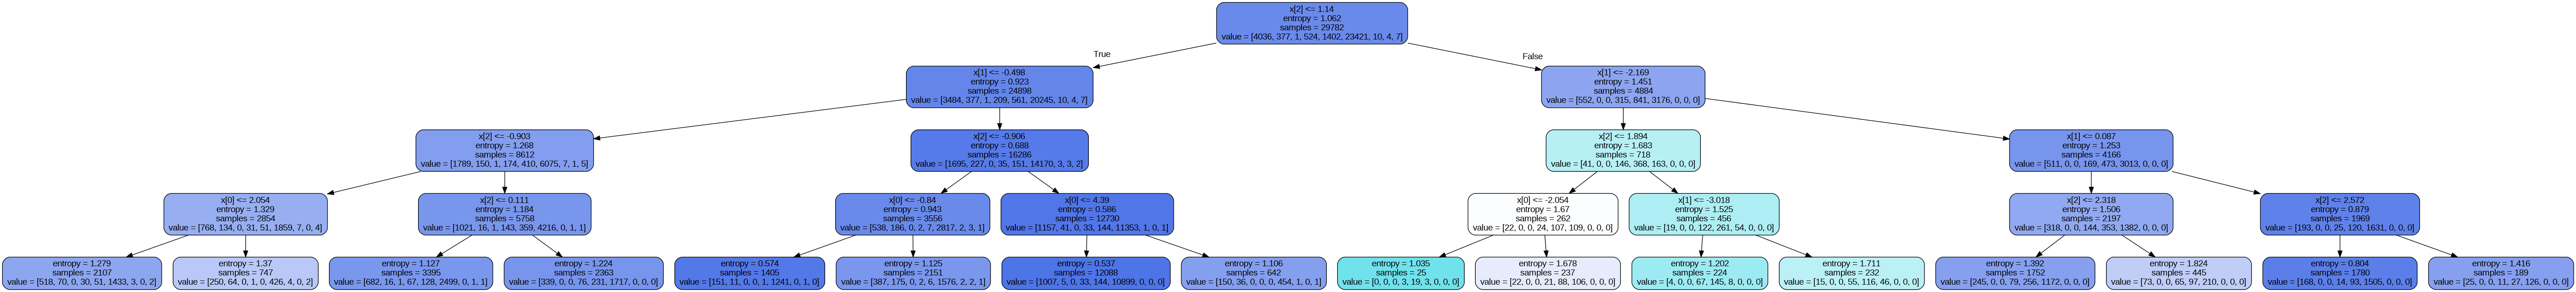

In [105]:
!pip install pydotplus # These libraries are used for Plotting the decision tree
import pydotplus
from sklearn.tree import export_graphviz
from sklearn.tree import export_graphviz
export_graphviz(clf.best_estimator_, out_file='tree.dot', filled=True, rounded=True) # Saving the image to the file
!dot -Tpng tree.dot -o tree.png
from IPython.display import Image # For displaying the decision tree along with its entropy, samples etc
Image('tree.png')# Displays the image

In [112]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix
# F1-score
f1 = f1_score(t_test, y_pred, average='micro') # I had to use micro as there was an error showing and the reason was that..
# Accuracy
accuracy = accuracy_score(t_test, y_pred)
# Precision
precision = precision_score(t_test, y_pred, average='micro')
# Recall
recall = recall_score(t_test, y_pred, average='micro')
# Confusion matrix
confusion_matrix = confusion_matrix(t_test, y_pred)

# Print the results
print("F1-score:", f1)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

F1-score: 0.8039799435913507
Accuracy: 0.8039799435913507
Precision: 0.8039799435913507
Recall: 0.8039799435913507


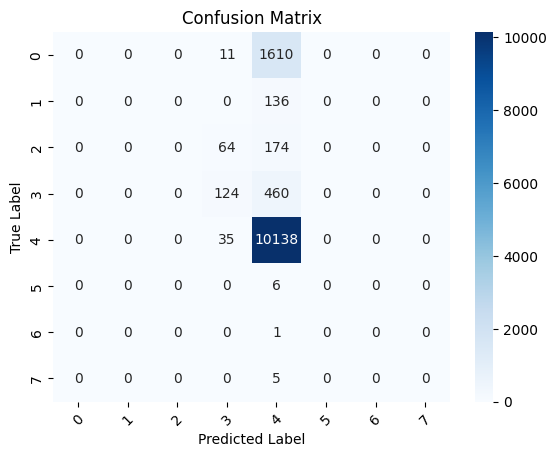

In [113]:
import seaborn as sns
# Create a confusion matrix heatmap
sns.heatmap(confusion_matrix, annot=True, cmap="Blues", fmt="d")
# Add labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)
plt.show()